# ECS7024P Statistics for Artificial Intelligence and Data Science - Coursework 3 | Task 2

## Table of Contents

- Section 1 - The Dataset
  - A. Source of datset and variables
  - B. Loading the Stork dataframe
- Section 2 - Exploratory Analysis
  - A. Model 1 Variables 
  - B. Model 2 Variables
- Section 3 - Linear Regression Models
  - A. Model 1 
  - B. Model 2 
- Section 4 - Bootstrap
  - A. Functions for Bootstrap
  - B. Calculations and Distributions of RMSE
- Section 5 - Results and Conclusions

## Section 1: The Dataset

The data set `modified_stork_data.csv`is derived from the study “Storks Deliver Babies (p = 0.008)” by Robert Matthews. The paper explores the statistically significant but nonsensical correlation between stork populations and human birth rates across various European countries. The variables within this modified dataset are defined below which include other predictors.

### Section 1.1 Variables

| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Country | A small selection of countries              | String |
|Area           | The land area in Km$^2$                          | Integer | 
|Storks   | The number of stork pairs           | Integer |
|Humans | The population, in millions of people | Continuous |
|BirthRate  | The annual birth rate in 1000s per year    | Integer |
|GDP_per_capita  | The GDP per head (in dollars)  | Integer |
|PopDensity  |The number of people divided by area in 1000s per Km$^2$  | Continuous |

### Section 1.2 Import Pandas and Load the Stork Data

In [9]:
import pandas as pd

#read the data frame and set 'Country' as the index
storks = pd.read_csv('modified_stork_data.csv', index_col='Country')

#display data frame
display(storks)

,Area,Storks,Humans,BirthRate,GDP_per_capita,PopDensity
Country,,,,,,
Albania,28750,100,3.2,83,3983,0.1113
Austria,83860,300,7.6,87,26930,0.0906
Belgium,30520,1,9.9,118,27412,0.3244
Bulgaria,111000,5000,9.0,117,8922,0.0811
Denmark,43100,9,5.1,59,29412,0.1183
France,544000,140,56.0,774,28129,0.1029
Germany,357000,3300,78.0,901,25391,0.2185
Greece,132000,2500,10.0,106,15964,0.0758
Holland,41900,4,15.0,188,27515,0.3580


## Section 2: Exploratory Analysis

### Section 2.1: Model 1 Variables

This section visualises the distributions and relationship between the variables 'BirthRate'(target) and 'Storks' (predictor), key components of Model 1 for regression analysis.

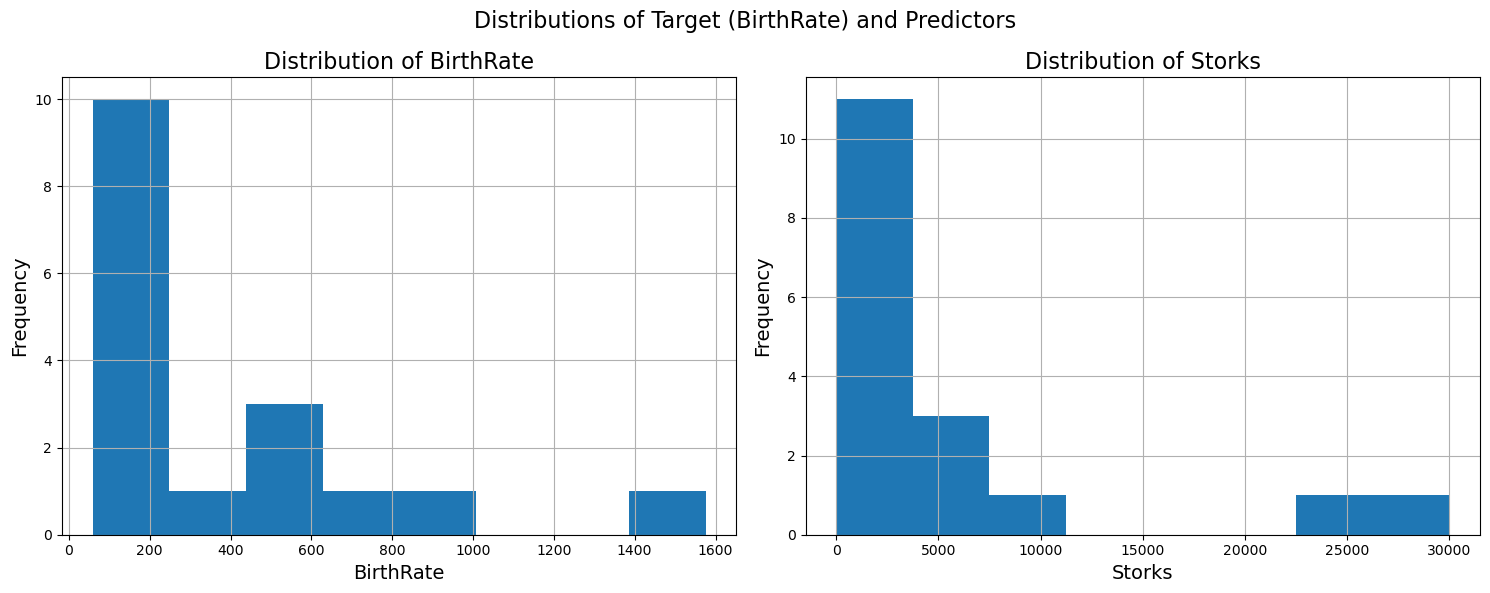

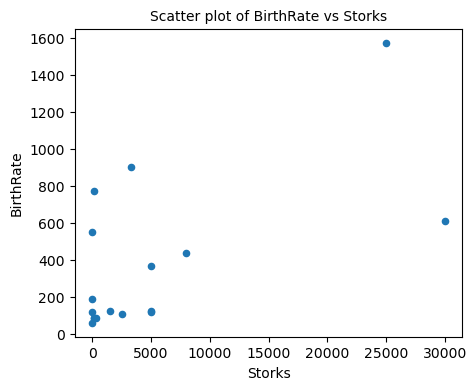

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#define model 1 target and predictor
model1_columns = ['BirthRate', 'Storks']

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 2 rows, 2 columns grid
axes = axes.flatten()  #flatten 2D array

#plot histograms to show variable distribution
for i in range(len(model1_columns)):
    storks[[model1_columns[i]]].hist(bins=8, ax=axes[i])
    axes[i].set_title(f'Distribution of {model1_columns[i]}', fontsize=16)
    axes[i].set_xlabel(model1_columns[i], size=14)
    axes[i].set_ylabel('Frequency', size=14)

#add title
plt.suptitle('Distributions of Target (BirthRate) and Predictors', fontsize=16)

#display histograms
plt.tight_layout()
plt.show()

#plot scatterplot to show relationship
storks.plot(kind='scatter',  x='Storks', y='BirthRate', figsize=(5,4))
plt.title('Scatter plot of BirthRate vs Storks', size=10);

- The distribution plots show both the BirthRate and Storks variables to be highly skewed, with most values concentrated at lower ranges and a few extreme outliers.
  
- The scatterplot shows a positive relationship between the number of stork pairs and birth rates, where regions with higher stork counts appear to have higher birth rates. However, this doesn't imply causation, the correlation may be due to other factors (e.g. rural environments) influencing both stork presence and birth rates. 

### Section 2.2: Model 2 Variables

This section visualises the distributions and relationship between the variables 'BirthRate'(target) and 'Humans', 'GDP_per_capita' and 'PopDensity' (predictors), key components of Model 2 for regression analysis.

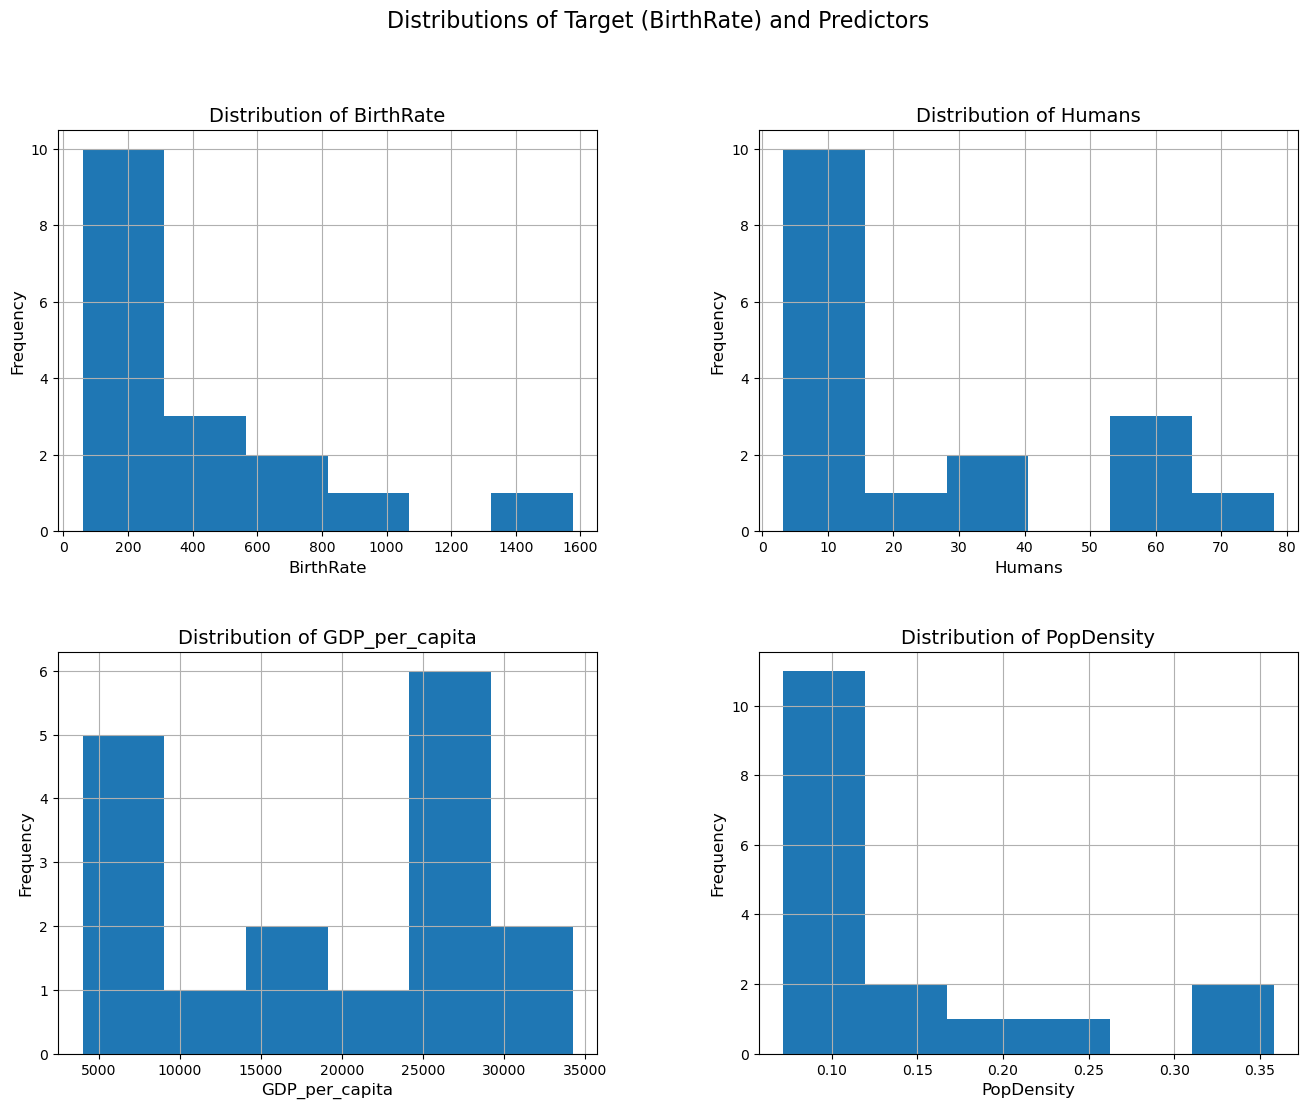

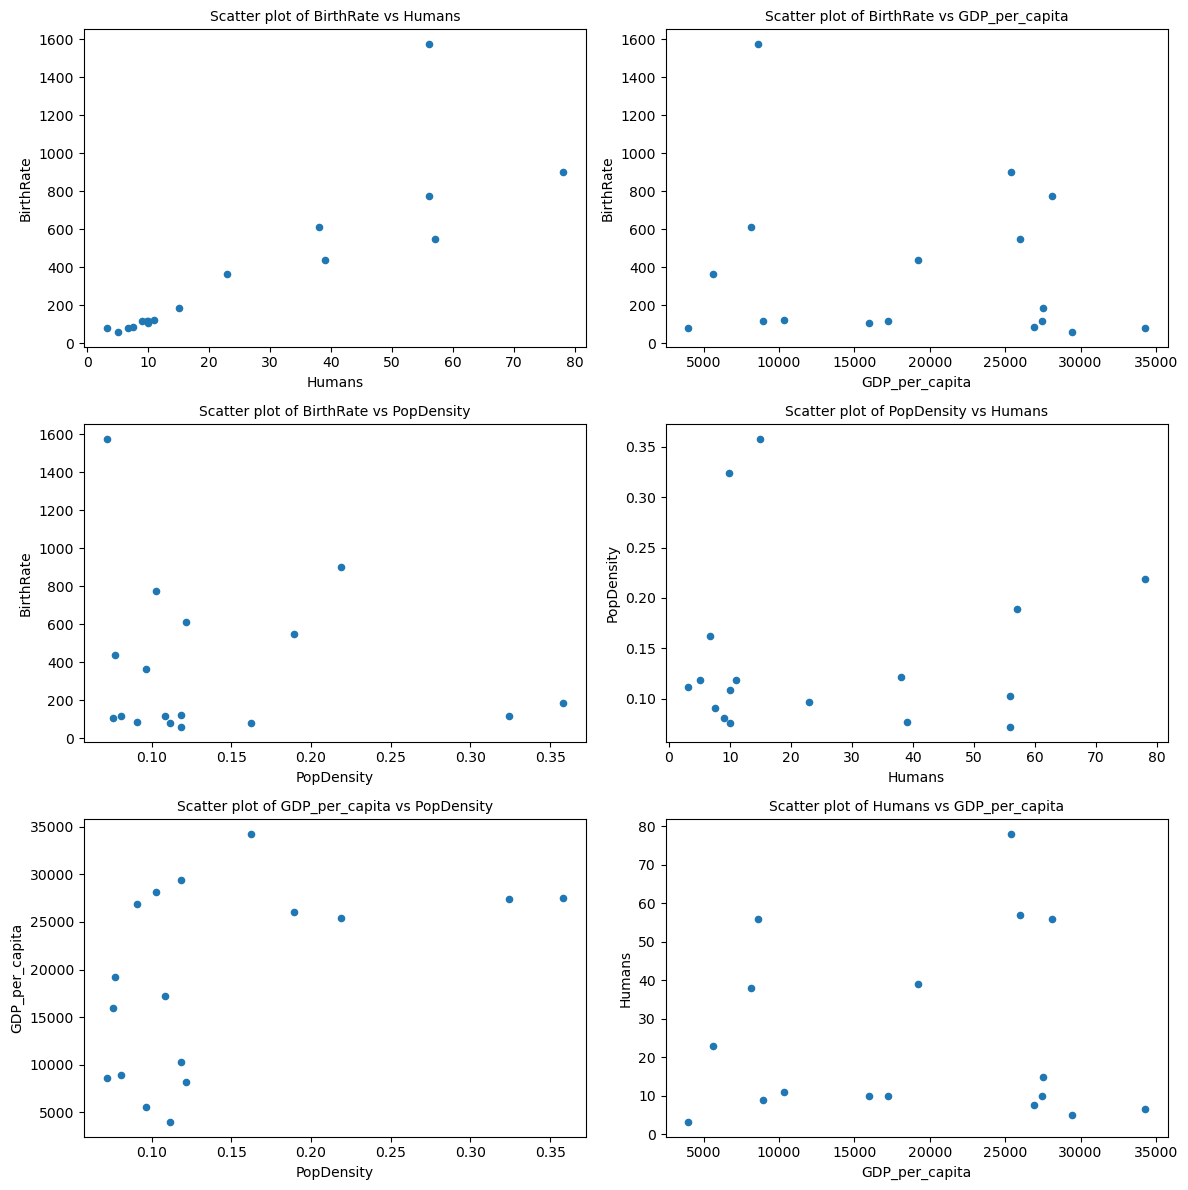

In [17]:
#define model 2 target and predictors
model2_columns = ['BirthRate', 'Humans', 'GDP_per_capita', 'PopDensity']

#create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  #2 rows, 2 columns
axes = axes.flatten()  #flatten for indexing

#plot histograms to show variable distribution
for i in range(len(model2_columns)):
    storks[[model2_columns[i]]].hist(bins=6, ax=axes[i])
    axes[i].set_title(f'Distribution of {model2_columns[i]}', fontsize=14)
    axes[i].set_xlabel(model2_columns[i], size=12)
    axes[i].set_ylabel('Frequency', size=12)

#add title
plt.suptitle('Distributions of Target (BirthRate) and Predictors', fontsize=16)

#display histograms
plt.show()

#define the scatter plots
scatter_pairs = [('Humans', 'BirthRate'),('GDP_per_capita', 'BirthRate'),('PopDensity', 'BirthRate'),
    ('Humans', 'PopDensity'),('PopDensity', 'GDP_per_capita'),('GDP_per_capita', 'Humans')]

#create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  #3 rows, 2 columns
axes = axes.flatten()  #flatten for indexing

#plot scatterplot to show relationships
for i, (x, y) in enumerate(scatter_pairs):
    storks.plot(kind='scatter', x=x, y=y, ax=axes[i], figsize=(12, 12))
    axes[i].set_title(f'Scatter plot of {y} vs {x}', fontsize=10)

plt.tight_layout()
plt.show()

- The histograms show that BirthRate, Humans and  PopDensity have skewed distributions, with most values concentrated at lower ranges with outliers. In contrast, GDP_per_capita is more evenly distributed showing less variability across regions.
  
- The relationships between the variables are difficult to distinguish due to the small data size however, there are positive associations between BirthRate and variables including Humans and GDP_per_capita. BirthRate and PopDensity appear to have an inverse relationship which could be reflective of urbanisation. The relationships amoungst the predictors are either weak or there appears to be no linear assosiation between them.

## Section 3: Linear Regression Models

This section compares two regression models with different predictors to explain the variability in the number of births.

### Section 3.1: Model 1

Linear Regression Model 1 aims to explain the variability of the number of births (BirthRate) using the number of storks (Storks) as the sole predictor.

$BirthRate = \beta_0 + \beta_1 \cdot Storks + \epsilon$

Where:

- $BirthRate$ - The target (dependent variable) we wish to explain
- $Storks$ - The predictor (independent variable)
- $\beta_0$ - The intercept (value of BirthRate when Storks=0)
- $\beta_1$ - The slope (How much BirthRate changes per unit increase in Storks)
- $\epsilon$ - The error term (variability not explained by the model) 

#### Section 3.1.1: Model 1 Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np

#define target and predictors (X_1, y_1)
y_1 = storks.BirthRate
X_1 = np.column_stack([storks.Storks])

#fit the linear regression model and display the R2 coefficient of determination, intercept & coefficient
reg = LinearRegression().fit(X_1, y_1)

#display results
print(f"{'Metric':<35}{'Value':<20}")
print("="*43)
print(f"{'R2 Coefficient of Determination':<35}{reg.score(X_1, y_1):<20.3f}")
print(f"{'Intercept':<35}{reg.intercept_:<20.1f}")
print(f"{'Regression Coefficient (Storks)':<35}{reg.coef_.item():<20.2f}")

Metric                             Value               
R2 Coefficient of Determination    0.385               
Intercept                          225.0               
Regression Coefficient (Storks)    0.03                


The intercept value (225.0) represents the predicted birth rate when the number of storks is zero which is the baseline of this regression. The estimated regression coefficient for Storks indicates a 0.03 increase in BirthRate (1000s per year) per additional stork pair, indicating that Storks has a minimal, weak positive impact. Lastly, The $R^2$ coefficient of determination shows that around 38.5% of the variability in BirthRate is explained by Storks, leaving over 60% unexplained and thus indicating a weak model overall. 

#### Section 3.1.2: Distribution of Residuals (errors)

This section evaluates the performance of Model 1 by analyzing the residuals (prediction errors) and calculating the root mean squared error (RMSE).

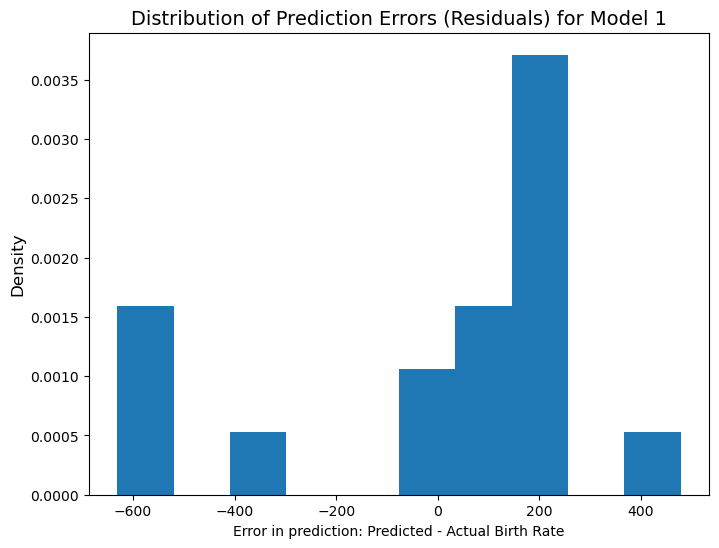

Root of the mean squared error: 312.03


In [28]:
from sklearn.metrics import root_mean_squared_error

#predicitng values using the fitted regression model
y_hat_1 = reg.predict(X_1)

#calculate residuals
residuals = y_hat_1 - y_1

#plot distribution
fig, a1 = plt.subplots(1, 1, figsize=(8,6))
a1.hist(residuals, bins=10, density=True)
a1.set_xlabel('Error in prediction: Predicted - Actual Birth Rate')
a1.set_ylabel('Density', fontsize=12)
a1.set_title('Distribution of Prediction Errors (Residuals) for Model 1', fontsize=14)

plt.show()

#display the mean squared error
print('Root of the mean squared error: %.2f'% root_mean_squared_error(y_1, y_hat_1))

- Residuals is the difference between predicted and actual BirthRate, the range from -600 to 400 as shown in the graph highlights significant prediction errors. The positive residuals reflect the over-predictions and negative residuals show under-predictions.

- The RMSE of 312.03 emphasises poor model accuracy, with Storks as the only predictor explaining only part of the variability. This reinforces the need for additional predictors to improve the model's performance.

#### Section 3.1.3: Model Accuracy

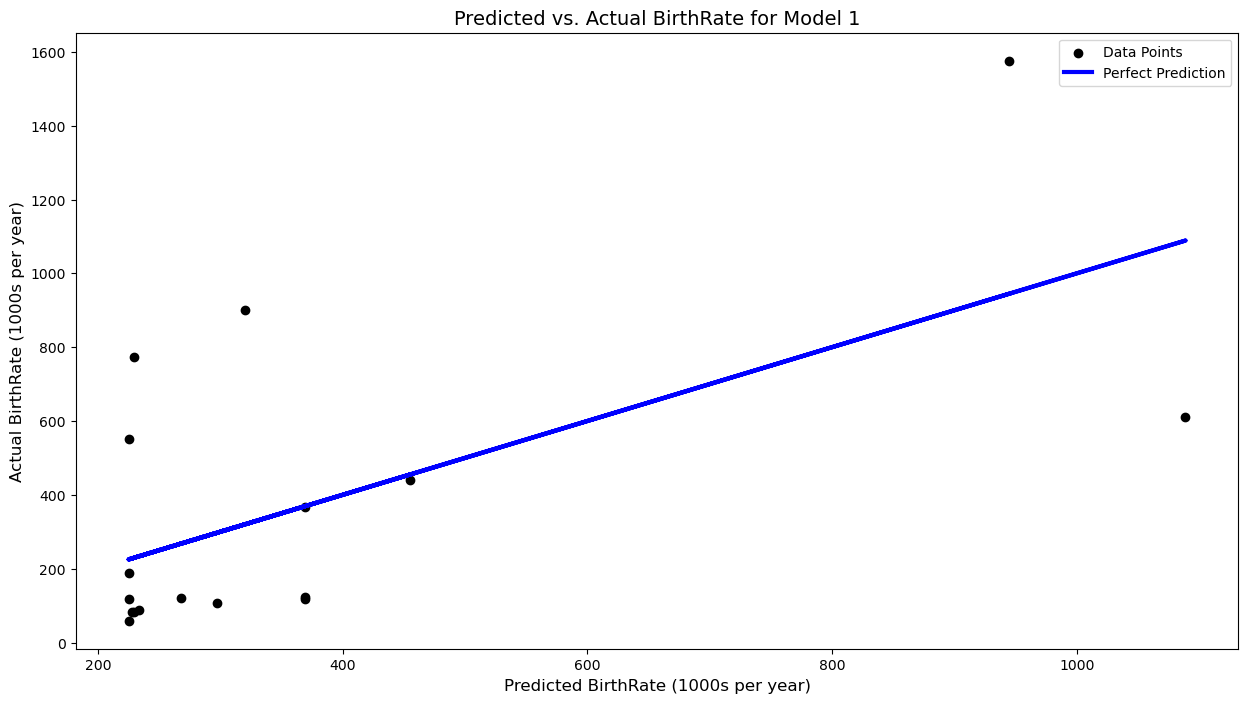

In [31]:
#plot predicted vs actual values
fig, a = plt.subplots(1,1,figsize=(15,8))
a.scatter(y_hat_1, y_1,  color='black', label='Data Points')
a.plot(y_hat_1, y_hat_1, color='blue', linewidth=3, label='Perfect Prediction')

#set titles and axis
a.set_xlabel('Predicted BirthRate (1000s per year)', fontsize=12)
a.set_ylabel('Actual BirthRate (1000s per year)', fontsize=12)
a.set_title('Predicted vs. Actual BirthRate for Model 1', fontsize=14)
a.legend()

#display model accuracy graph 
plt.show()

This graph compares the predicted BirthRate values (x-axis) with the actual values (y-axis) for Model 1. 

- The prediction accuracy is shown through the data points, with most shown to deviate significantly from the perfect prediction line, indicating that Model 1 struggles to make accurate predictions. The predictions either underestimate or overestimate BirthRate, shown from the points being scattered far from the line.

- This graph reinforces that using Storks as the sole predictor doesn't capture the variability in BirthRate, consistent with the low $R^2$ and high RMSE values.

### Section 3.2: Model 2

Linear Regression Model 2 aims to explain the variability of the number of births (BirthRate) using a set of predictors, not including Storks, which are stated and justfied as follows:

- Population size (Humans) - There are more births in larger populations
- GDP per Capita (GDP_per_capita) - An increase in prosperity has been associated with a reduction in
family size
- Population Density (PopDensity) - Derived from the area of the country and its population size, high population density may discourage larger families 

The model is created as:

$BirthRate = \beta_0 + \beta_1 \cdot Humans + \beta_2 \cdot GDP\_per\_capita + \beta_3 \cdot PopDensity + \epsilon$

Where:

- $BirthRate$ - The target (dependent variable) we wish to explain
- $Humans, GDP\_per\_capita, PopDensity$ - The predictors (independent variables)
- $\beta_0$ - The intercept (value of BirthRate when all predictors=0)
- $\beta_1, \beta_2, \beta_3$ - The Coefficients (How much BirthRate changes per unit increase in each predictor, holding the others constant)
- $\epsilon$ - The error term (variability not explained by the model) 

#### Section 3.2.1: Model 2 Linear Regression

In [36]:
#define target and predictors (X_2, y_2)
y_2 = storks.BirthRate
X_2 = np.column_stack((storks.Humans, storks.GDP_per_capita, storks.PopDensity))

#fit the linear regression model and display the R2 coefficient of determination, intercept & coefficient
reg_2 = LinearRegression().fit(X_2, y_2)

#define coefficients
beta_Humans, beta_GDP_per_capita, beta_PopDensity = reg_2.coef_

#display results
print(f"{'Metric':<40}{'Value':<20}")
print("="*50)
print(f"{'R2 Coefficient of Determination':<40}{reg_2.score(X_2, y_2):<20.3f}")
print(f"{'Intercept':<40}{reg_2.intercept_:<20.1f}")
print(f"{'Regression Coefficient (Humans)':<40}{beta_Humans:<20.2f}")
print(f"{'Regression Coefficient (GDP_per_capita)':<40}{beta_GDP_per_capita:<20.2f}")
print(f"{'Regression Coefficient (PopDensity)':<40}{beta_PopDensity:<20.2f}")

Metric                                  Value               
R2 Coefficient of Determination         0.774               
Intercept                               173.9               
Regression Coefficient (Humans)         15.08               
Regression Coefficient (GDP_per_capita) -0.01               
Regression Coefficient (PopDensity)     -274.89             


The intercept value (173.9) represents the predicted birth rate when all predictors (Humans, GDP_per_capita, PopDensity) are zero which is the baseline of this regression. The estimated regression coefficients show:

- A one-unit (million) increase in population (Humans), the BirthRate increases by 15.08 (1000s per year), holding other predictors constant. This aligns with the expectation that larger populations result in more births.
- A one-unit increase in GDP_per_capita (dollars) the BirthRate decreases by 0.01 (1000s per year), holding other predictors constant. This supports the idea that higher prosperity is associated with smaller family sizes.
- A one-unit increase in population density, the BirthRate decreases by 274.89 (1000s per year), holding other predictors constant. This negative coefficient supports the idea that that higher population density discourages larger family sizes.

The $R^2$ coefficient of determination shows that around 77.4% of the variability in BirthRate is explained by Humans, GDP_per_capita, PopDensity, this is an improvement from model 1 and the factors gives more insight compared to Storks. However, there is still over 20% unexplained meaning the model isn't perfect. 

#### Section 3.2.2: Distribution of Residuals (errors)

This section evaluates the performance of Model 2 by analyzing the residuals (prediction errors) and calculating the root mean squared error (RMSE).

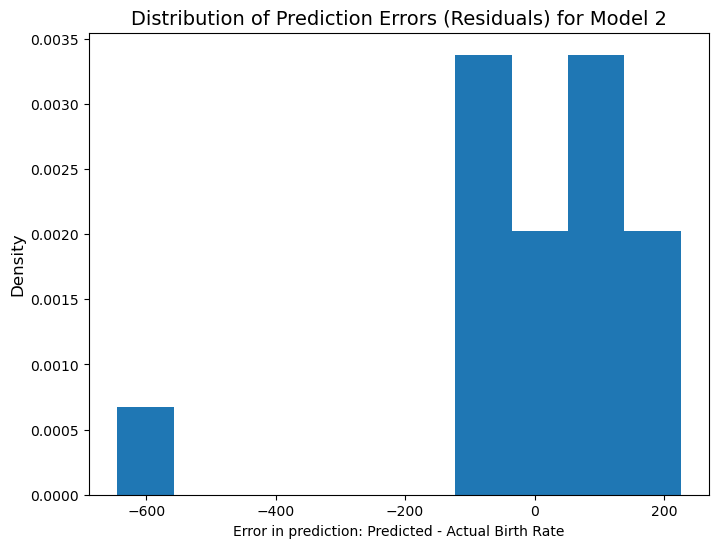

Root of the mean squared error: 189.26


In [40]:
#predicitng values using the fitted regression model
y_hat_2 = reg_2.predict(X_2)

#calculate residuals
residuals = y_hat_2 - y_2

#plot distribution
fig, a1 = plt.subplots(1, 1, figsize=(8,6))
a1.hist(residuals, bins=10, density=True)
a1.set_xlabel('Error in prediction: Predicted - Actual Birth Rate')
a1.set_ylabel('Density', fontsize=12)
a1.set_title('Distribution of Prediction Errors (Residuals) for Model 2', fontsize=14)

plt.show()

#display the mean squared error
print('Root of the mean squared error: %.2f'% root_mean_squared_error(y_2, y_hat_2))

- The residuals in model 2 are more clustered around zero compared to model 1, showing better predictive accuracy. $

- The RMSE of 189.26 is significantly lower than Model 1's RMSE. This indicates that Model 2, which performs better at explaining the variability in BirthRate and makes more accurate predictions. However, the presence of large residuals (e.g. -600) suggests room for further improvement.

#### Section 3.2.3: Model Accuracy

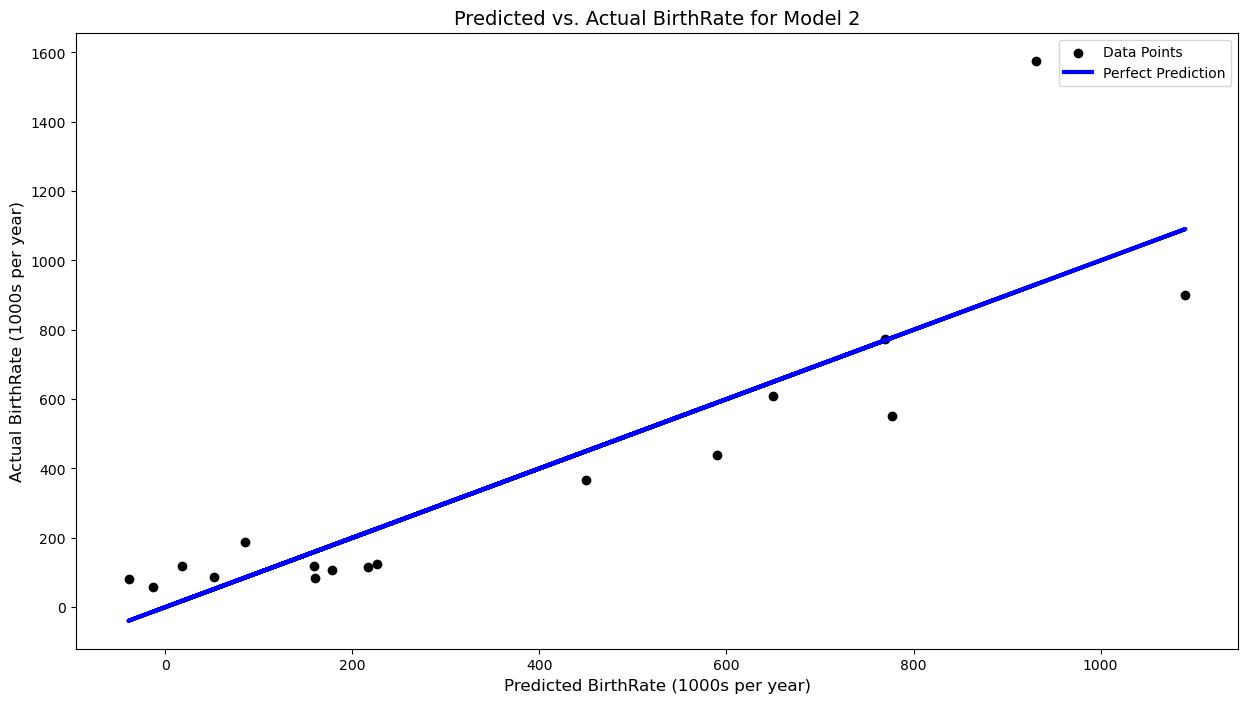

In [43]:
#plot predicted vs actual values
fig, a = plt.subplots(1,1,figsize=(15,8))
a.scatter(y_hat_2, y_2,  color='black', label='Data Points')
a.plot(y_hat_2, y_hat_2, color='blue', linewidth=3, label='Perfect Prediction')

#set titles and axis
a.set_xlabel('Predicted BirthRate (1000s per year)', fontsize=12)
a.set_ylabel('Actual BirthRate (1000s per year)', fontsize=12)
a.set_title('Predicted vs. Actual BirthRate for Model 2', fontsize=14)
a.legend()

#display model accuracy graph 
plt.show()

This graph compares the predicted BirthRate values (x-axis) with the actual values (y-axis) for Model 2. 

- The data points are closer to the perfect prediction line compared to model 1, showing that model 2 performs better in approximating the actual values.

- The improved alignment with the line reflects a stronger predictive capability, consistent with the high $R^2$ and low RMSE values. However, deviations from the line such as at higher BirthRate values, suggest some inaccuracies are still present. 

## Section 4: Bootstrap

This section applies the bootstrap technique to estimate confidence intervals for the RMSE difference between the two regression models, evaluating their predictive accuracy

### Section 4.1: Functions for Bootstrap

#### Section 4.1.1: Function for Re-Sampling

This function performs bootstrap resampling to estimate results and confidence intervals.

In [50]:
from sklearn.utils import resample

def bootstrapC(data, cols, repeats, func):

    #data (e.g. array) - dataframe to be re-sampled
    #cols (list) - a list of column headings in the results dataframe
    #repeats (int) - the number of times the bootstrap is repeated
    #func - the function calculates the results for each bootstrap sample
    
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    
    return result
    

#### Section 4.1.2: Function for Regression Models

This function calculates the root mean squared error (RMSE) difference between two regression models to compare their predictive accuracy.

In [53]:
def regression_model(data):
 
    #define target and predictors
    y = data.BirthRate
    X_1 = np.column_stack([data.Storks])
    X_2 = np.column_stack((data.Humans, data.GDP_per_capita, data.PopDensity))

    #fit the regression model
    reg_1 = LinearRegression().fit(X_1, y)
    reg_2 = LinearRegression().fit(X_2, y)

    #predicited values
    y_hat_1 = reg_1.predict(X_1)
    y_hat_2 = reg_2.predict(X_2) 
    
    #RMSE
    rmse_1 = root_mean_squared_error(y, y_hat_1)
    rmse_2 = root_mean_squared_error(y, y_hat_2)
    rmse_difference = rmse_1-rmse_2

    #combine metrics into a single list
    return rmse_difference 


### Section 4.2 Calculations and Distributions of RMSE


RMSE Difference is 122.8, with 90% CI from  8.9 to 241.7


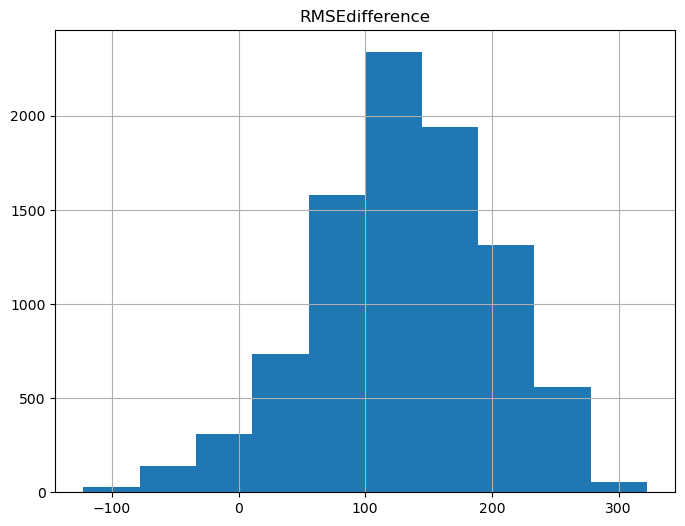

In [55]:
bstrap = bootstrapC(storks, ['RMSEdifference'], 9000, regression_model) 

bstrap.hist(figsize=(8,6))
rmse_difference = regression_model(storks)

print("\nRMSE Difference is %4.1f, with 90%% CI from %4.1f to %4.1f" % 
      (rmse_difference, bstrap.RMSEdifference.quantile(0.05), bstrap.RMSEdifference.quantile(0.95)))

## Section 5 Results and Conclusions

Principals of the Bootstrap method

- The Bootstrap method generates a sampling distribution by continously resampling the original dataset with replacement which creates new Bootstrap samples. For each sample, the statistic of interest, in this case the RMSE is calculated. The Bootstrap distributon of the statistic is used to estimate confidence intervals. This approach avoids theoretical assumptions about the population distribution and instead uses the observed data.

Conclusion of the test

- The analysis calculated an RMSE difference of 122.8 between the two models, with a 90% confidence interval ranging from 7.5 to 241.1. This confidence interval doesn't include zero which indicates that model 2 consistently performs better than model 1 in predicting BirthRate. Thus, we can be confident that model 2 fits better than model 1.

Fit of the two Models on the true causes of BirthRate variability

- Model 1 uses Storks as the sole predictor, which doesn't meaningfully explain the variability in BirthRate, emphasised by the high RMSE and low $R^2$. Model 2 uses more meaningful predictors such as population size, GDP per capita and population density which better reflect the real-world drivers of birth rates. The improvement in model 2 suggests that the predictors in this model are more aligned with the true underlying factors which influence birth rates in comparison to stork populations which in the real-world have no influence on birth rates. 